# Overview 

This notebook includes:
- SHAP explanation for regression prediction on a Tabular dataset
- Regression task is to predict house prices
- Demo explaining Random Forest model with Tree SHAP
- Coding Challenge: Implement the LIME explanation for the same prediction

**Implementation of SHAP for Images Data**

In this notebook, the implementation of SHAP in Pyhton is demonstrated. The source code of SHAP is accessible over [Github](https://github.com/slundberg/shap). 

In [1]:
import shap
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

### Load data into dataframe

In [2]:
boston = load_boston()

# Create a Pandas dataframe with all the features
X = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
y = boston['target']

In [3]:
print(boston.DESCR) # Provides the discription of dataset used in this notebook.

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Random Forest 

In [4]:
# Split the data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [5]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(Xtrain, ytrain)

RandomForestRegressor()

In [6]:
rf_train = rf_reg.score(Xtrain, ytrain)
rf_cv = cross_val_score(rf_reg, Xtrain, ytrain, cv=5).mean()
rf_test = rf_reg.score(Xtest, ytest)
print('Evaluation of the Random Forest performance\n')
print(f'Training score: {rf_train.round(4)}')
print(f'Cross validation score: {rf_cv.round(4)}')
print(f'Test score: {rf_test.round(4)}')

Evaluation of the Random Forest performance

Training score: 0.9806
Cross validation score: 0.8614
Test score: 0.852


### SHAP values

In [7]:
# Initialize JavaScript visualization
shap.initjs()

In [8]:
# Create SHAP explainer
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [9]:
shap.initjs() # Required in each and evry cell where you are Visualizing information using javascript library.
# shap force plot for the first prediction
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [10]:
shap.initjs()
# SHAP values for all predictions
shap.force_plot(explainer.expected_value, shap_values, X)

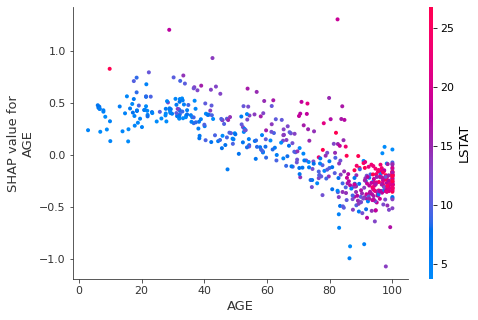

In [11]:
# Effect of a single feature on the shap value,and automatically selected other feature to show dependence 
shap.dependence_plot('AGE', shap_values, X)

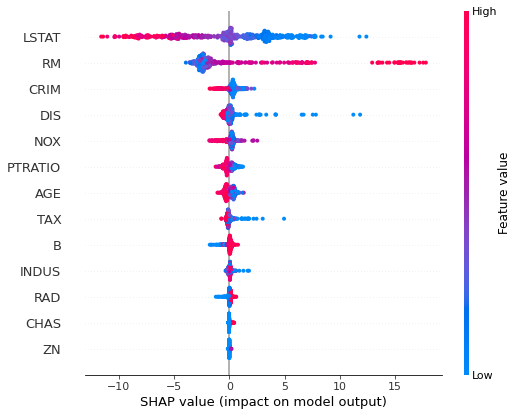

In [12]:
# See how every feaure contributes to the model output
shap.summary_plot(shap_values, X)

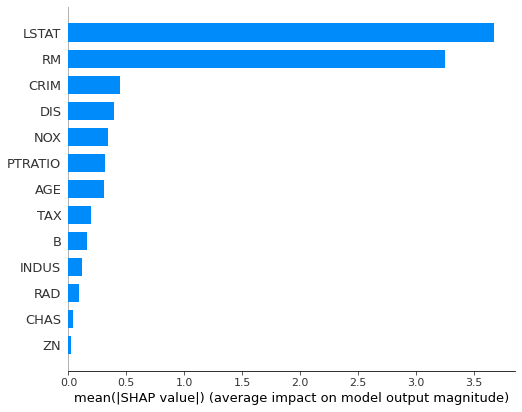

In [13]:
shap.summary_plot(shap_values, X, plot_type="bar")

# Understanding Visualization

* Summary plot shows the positive and negative relationships of the predictors with the target variable. It looks dotty because it is made of all the instances in the train data. In this plot all the features are ranked in descending order that shows the importance of the features. The x-axis shows whether the effect of that value is associated with a higher or lower prediction. Red and blue colors shows the influence of the attribute (Red shows high infulence and blue shows less influence)

* Force plot shows features each contributing to push the model output from the base value to the model output. The base value id the average model output over the training dataset. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. Force plots can show explanations of each instance or it can be used to plot exaplantion of all instances in the dataset to understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs the value of the feature for all the examples in a dataset.

* SHAP dependence plots shows the effect of a single feature across the whole dataset. They plot a feature's value vs. the SHAP value of that feature across many samples.



# Explore SHAP Package Documentation

In [14]:
 help(shap.TreeExplainer)

Help on class TreeExplainer in module shap.explainers.tree:

class TreeExplainer(shap.explainers.explainer.Explainer)
 |  TreeExplainer(model, data=None, model_output='raw', feature_perturbation='interventional', **deprecated_options)
 |  
 |  Uses Tree SHAP algorithms to explain the output of ensemble tree models.
 |  
 |  Tree SHAP is a fast and exact method to estimate SHAP values for tree models and ensembles of trees,
 |  under several different possible assumptions about feature dependence. It depends on fast C++
 |  implementations either inside an externel model package or in the local compiled C extention.
 |  
 |  Parameters
 |  ----------
 |  model : model object
 |      The tree based machine learning model that we want to explain. XGBoost, LightGBM, CatBoost, Pyspark
 |      and most tree-based scikit-learn models are supported.
 |  
 |  data : numpy.array or pandas.DataFrame
 |      The background dataset to use for integrating out features. This argument is optional when

# Coding Challenge:
- Implement the LIME explanation for the same prediction.
- For Random Forest, obtain the global feature importance.
- Compare the feature explanations given by LIME, SHAP and Random Forest.
- Experiment with changing the number of iterations for SHAP explanation.